In [1]:
import os
from google.colab import drive

In [2]:
drive.mount("/content/drive/", force_remount = True)

Mounted at /content/drive/


In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive

/content/drive/MyDrive


In [5]:
cd XBBvariants

/content/drive/MyDrive/XBBvariants


In [26]:
order = ["XBB.1",  "XBB.1.5", "XBB.1.9.1", "XBB.1.16", "XBB.2.3", "EG.5.1"]#only for XBB

In [7]:
#results taken from PRODIGY ANALYSIS OF VARIANT + COMPLEX
cwd = os.getcwd() + os.sep
datapath = cwd + "Data" + os.sep
datapath

'/content/drive/MyDrive/XBBvariants/Data/'

In [27]:
import pandas as pd

#df = pd.read_csv(datapath+"xbb1_prodigy_SACE2_bindingaffinity.csv", header=0)#only for XBB
df = pd.read_csv(datapath+"xbb1_prodigy_RBDACE2_bindingaffinity.csv", header=0)#only for XBB
#df = pd.read_csv(datapath+"prodigy_RBDACE2_bindingaffinity.csv", header=0)
x = df["variant + ACE2"]
deltag = df["ΔG (kcal mol-1)"]
kd = df["Kd (M) at 36℃"]
df

,variant + ACE2,ΔG (kcal mol-1),Kd (M) at 36℃,ICs charged-charged,ICs charged-polar,ICs charged-apolar,ICs polar-polar,ICs polar-apolar,ICs apolar-apolar,NIS charged,NIS apolar
0,XBB.1,"-10,1","6,70E-08",3,8,16,4,15,6,"24,64","36,96"
1,EG.5.1,"-9,6","1,70E-07",3,8,15,4,13,7,"24,64","37,12"
2,XBB.2.3,"-9,7","1,40E-07",3,8,16,4,13,7,"24,64","36,96"
3,XBB.1.16,"-9,7","1,50E-07",3,8,16,4,13,7,"24,64","37,12"
4,XBB.1.9.1,"-9,7","1,50E-07",3,8,16,4,13,7,"24,64","37,12"
5,XBB.1.5,"-9,7","1,50E-07",3,8,16,4,13,7,"24,64","37,12"


In [28]:
variants = list(df.iloc[:, 0].values)
variants

['XBB.1', 'EG.5.1', 'XBB.2.3', 'XBB.1.16', 'XBB.1.9.1', 'XBB.1.5']

In [29]:
#only for XBB
idxs = []
for variant1 in order:
  for i, variant2 in enumerate(variants):
    print(variant1, variant2)
    if variant1 == variant2:
      idxs.append(i)
      break
idxs

XBB.1 XBB.1
XBB.1.5 XBB.1
XBB.1.5 EG.5.1
XBB.1.5 XBB.2.3
XBB.1.5 XBB.1.16
XBB.1.5 XBB.1.9.1
XBB.1.5 XBB.1.5
XBB.1.9.1 XBB.1
XBB.1.9.1 EG.5.1
XBB.1.9.1 XBB.2.3
XBB.1.9.1 XBB.1.16
XBB.1.9.1 XBB.1.9.1
XBB.1.16 XBB.1
XBB.1.16 EG.5.1
XBB.1.16 XBB.2.3
XBB.1.16 XBB.1.16
XBB.2.3 XBB.1
XBB.2.3 EG.5.1
XBB.2.3 XBB.2.3
EG.5.1 XBB.1
EG.5.1 EG.5.1


[0, 5, 4, 3, 2, 1]

In [30]:
import numpy as np

variants = np.array(variants)[idxs]#only for XBB
variants

array(['XBB.1', 'XBB.1.5', 'XBB.1.9.1', 'XBB.1.16', 'XBB.2.3', 'EG.5.1'],
      dtype='<U9')

In [31]:
deltag = [float(x.replace(",", ".")) for x in deltag]
deltag = [float(deltag[i]) for i in idxs]##only for XBB

In [32]:
deltag = list(deltag)
deltag

[-10.1, -9.7, -9.7, -9.7, -9.7, -9.6]

In [33]:
kd = [float(x.replace(",", ".")) for x in kd]
print(kd, idxs)           #only for XBB
kd = [kd[i] for i in idxs]#only for XBB
print(kd)

[6.7e-08, 1.7e-07, 1.4e-07, 1.5e-07, 1.5e-07, 1.5e-07] [0, 5, 4, 3, 2, 1]
[6.7e-08, 1.5e-07, 1.5e-07, 1.5e-07, 1.4e-07, 1.7e-07]


In [34]:
deltag_rif = deltag[0]
deltadeltag = [dg - deltag_rif for dg in deltag][1:]
deltadeltag

[0.40000000000000036,
 0.40000000000000036,
 0.40000000000000036,
 0.40000000000000036,
 0.5]

In [35]:
import matplotlib.pyplot as plt

In [36]:
variants

array(['XBB.1', 'XBB.1.5', 'XBB.1.9.1', 'XBB.1.16', 'XBB.2.3', 'EG.5.1'],
      dtype='<U9')

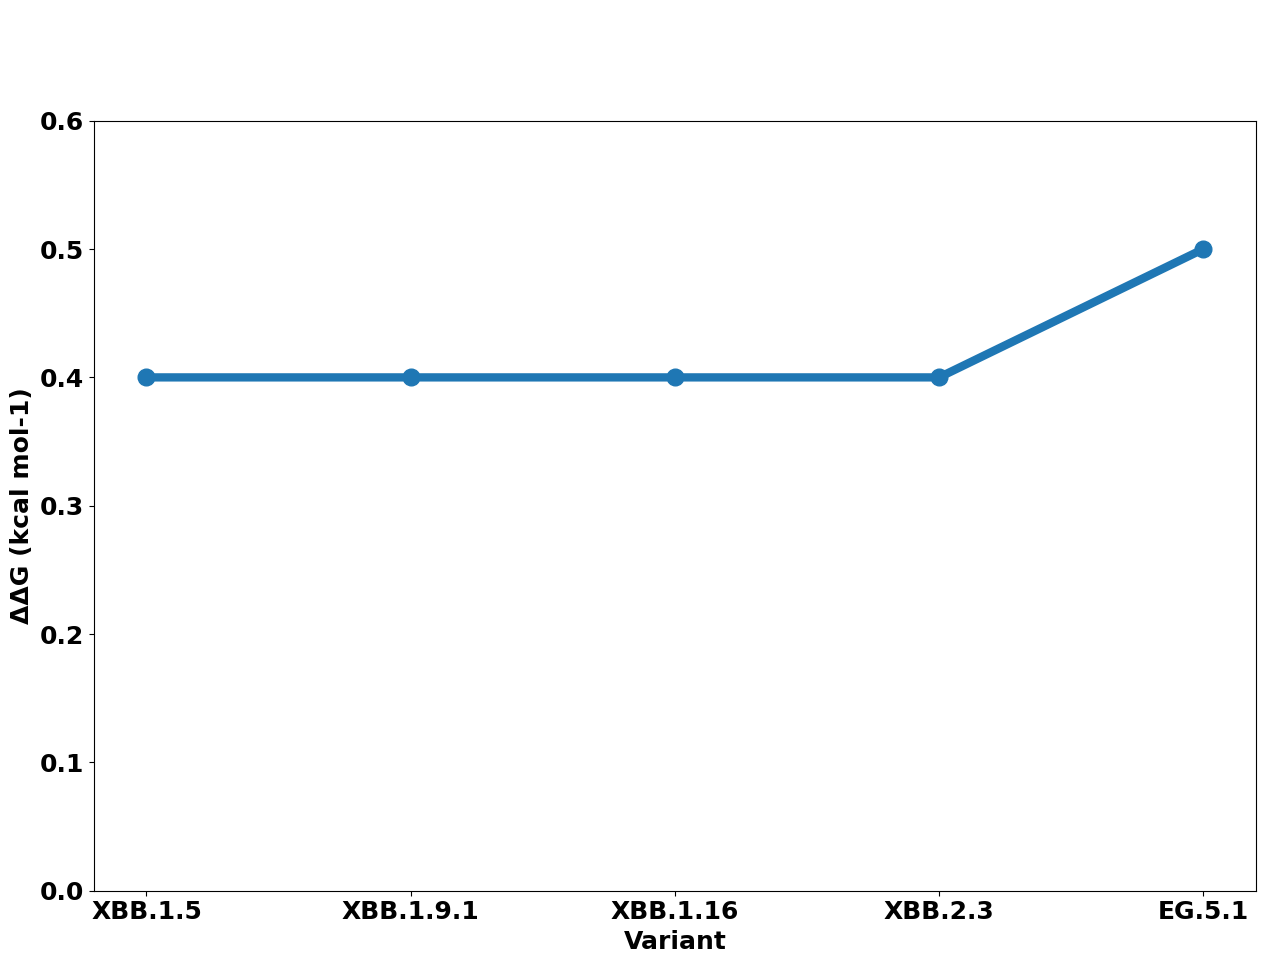

In [37]:
plt.figure(figsize = [15, 10])
plt.plot(variants[1:], deltadeltag, marker = "o", linewidth = 6, markersize = 12)
plt.xlabel('Variant', fontsize = 18, weight='bold')
plt.ylabel('ΔΔG (kcal mol-1)', fontsize = 18, weight='bold')
#plt.title('Binding Affinity', fontsize = 24, weight='bold')
plt.title('\n\n', fontsize = 24, weight='bold')
plt.xticks(weight='bold', fontsize = 18)
plt.yticks(weight='bold', fontsize = 18)
plt.ylim([0, 0.6]) ##only for XBB
#plt.ylim([-0.25, 2.1])
plt.savefig(cwd+"/Figures/FigDeltaDeltaG.png")##only for XBB
#plt.savefig(cwd+"/Figures/FigDeltaDeltaG_BA2WT.png")
plt.show()

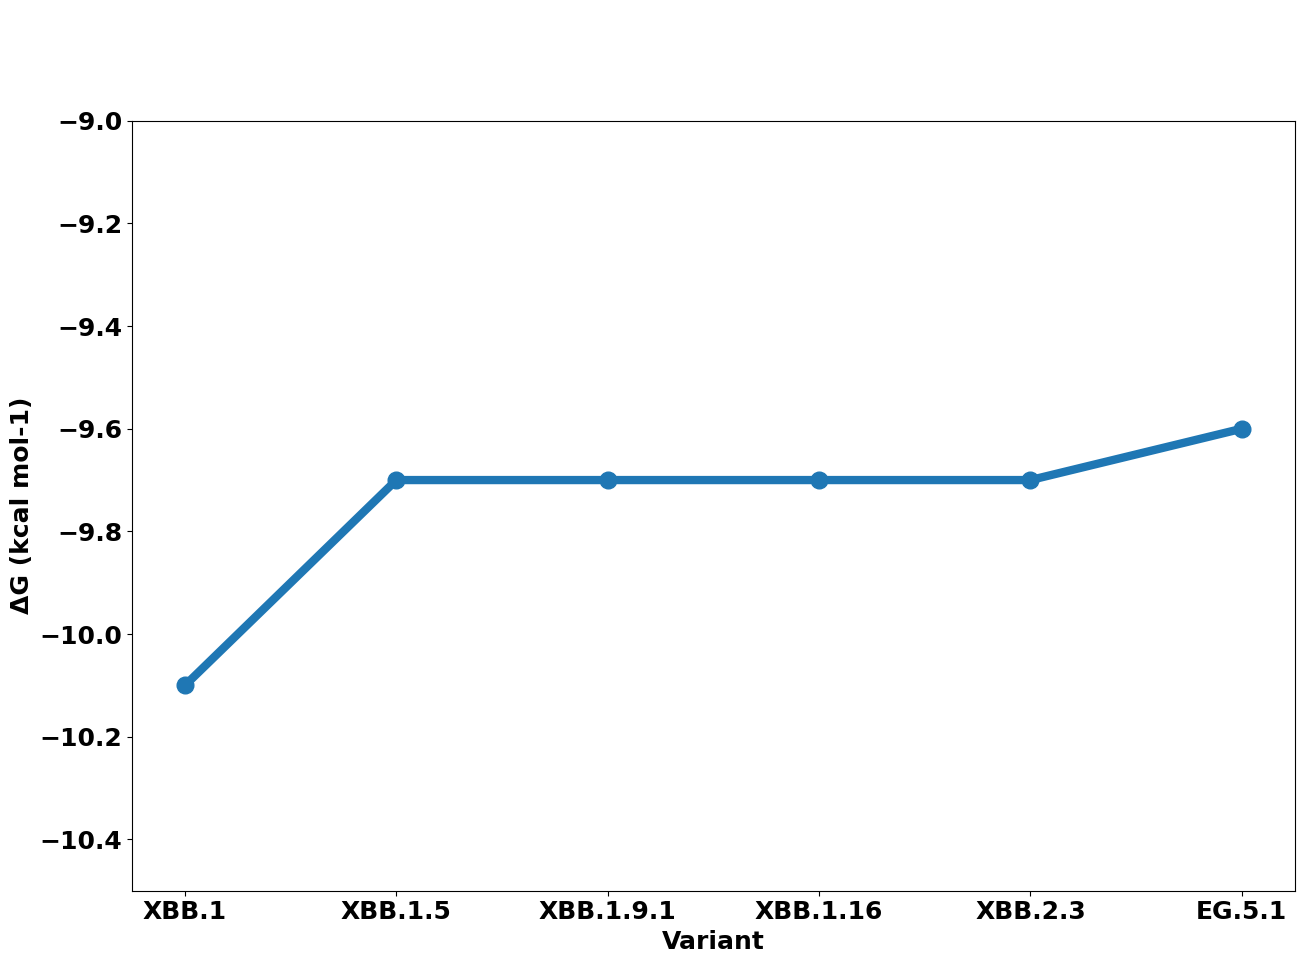

In [38]:
plt.figure(figsize = [15, 10])
plt.plot(variants, deltag, marker = "o",linewidth = 6, markersize = 12)
plt.xlabel('Variant', fontsize = 18, weight='bold')
plt.ylabel('ΔG (kcal mol-1)', fontsize = 18, weight='bold')
#plt.title('Binding Affinity', fontsize = 24, weight='bold')
plt.title('\n\n', fontsize = 24, weight='bold')
plt.xticks(fontsize = 18, weight='bold')
plt.yticks(fontsize = 18, weight='bold')
plt.ylim([-10.5, -9])#ONLY XBB
#plt.ylim(-12, -9)
plt.savefig(cwd+"/Figures/FigDeltaG.png")#ONLY XBB
#plt.savefig(cwd+"/Figures/FigDeltaG_BA2WT.png")
plt.show()

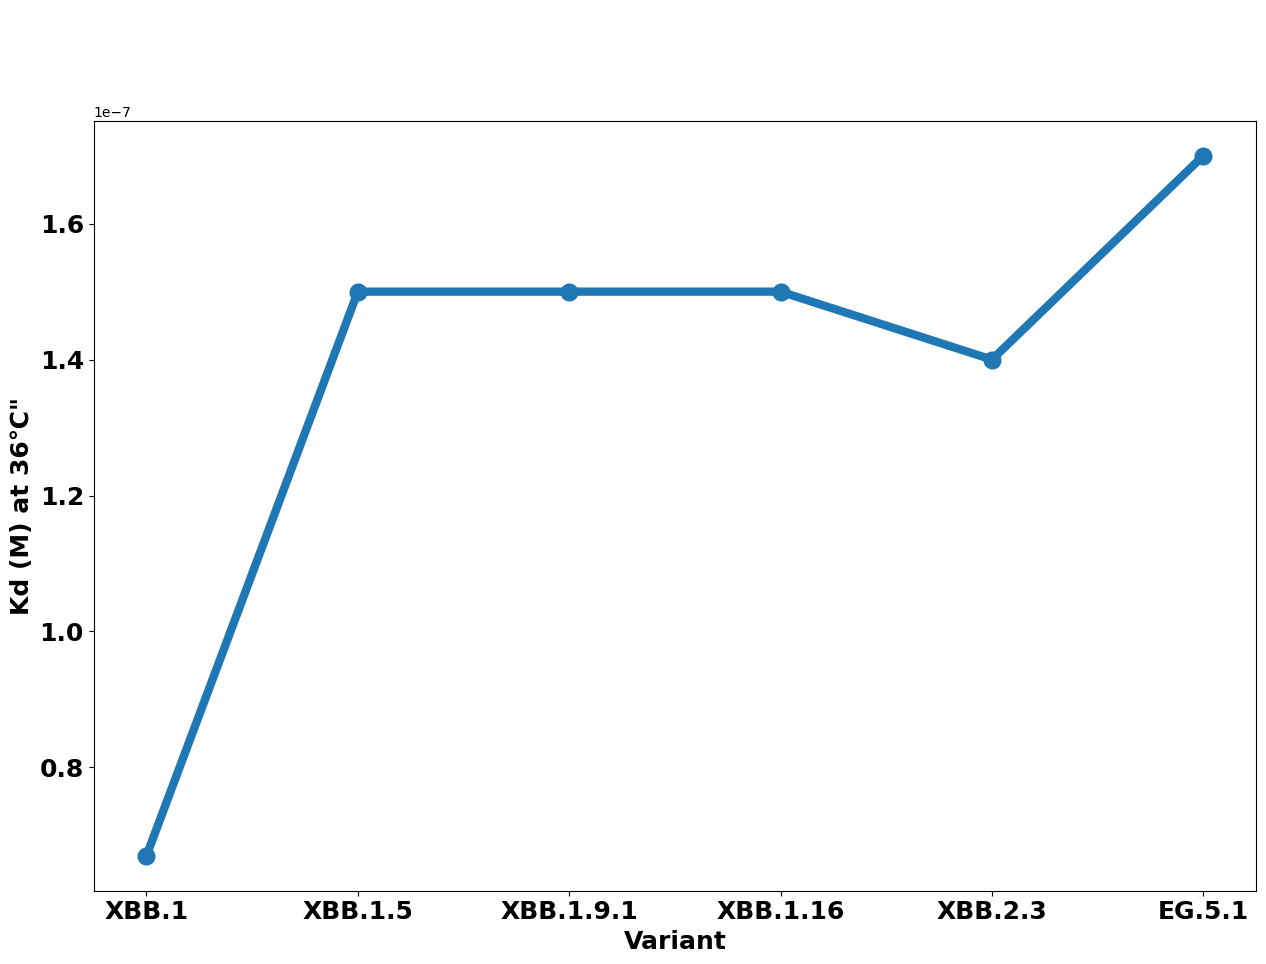

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = [15, 10])
plt.plot(variants, kd, marker = "o", linewidth = 6, markersize = 12)
plt.xlabel('Variant',  fontsize = 18, weight='bold')
plt.ylabel('Kd (M) at 36℃"', fontsize = 18, weight='bold')
#plt.title('Binding Affinity', fontsize = 24, weight='bold')
plt.title('\n\n', fontsize = 24, weight='bold')
plt.xticks(weight='bold', fontsize = 18)
plt.yticks(weight='bold', fontsize = 18)

#plt.savefig(cwd+"/Figures/FigKD_BA2WT.png")
plt.savefig(cwd+"/Figures/FigKD.png")##ONLY XBB
plt.show()